## Welcome to our Jupyter Notebook

### Jupyter Cells

**Markdown** and **Code** 

In [1]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Imports
The import command is running the pandas source code, around 200,000 lines, and keeping that all in memory! Computers are amazing!

#### A land before pandas

Before we jump into Pandas let's take a look at what people did before it. 

Organizing data using dictionaries.

In [6]:
# Here is an example dictionary - run the cell and load it into memory.

fruit_dictionary = {
    "name" : ['lemon', 'banana', 'apple' , 'strawberry'],
    "color" : [['yellow'], ['yellow'], ['red', 'green'], ['red']],
    "edible_seeds" : ['no', 'yes', 'no', 'yes']
}

Dictionaries are broken up into key-value pairs.
    
    dict_name = { key : value }

We can use the built in key() and value() methods to see the contents of the dictionary.


In [7]:
# print the keys and values for fruit_dictionary
print("Dictionary keys: ", fruit_dictionary.keys(), "\n\n")
print("Dictionary values: ", fruit_dictionary.values(), "\n\n")


Dictionary keys:  dict_keys(['name', 'color', 'edible_seeds']) 


Dictionary values:  dict_values([['lemon', 'banana', 'apple', 'strawberry'], [['yellow'], ['yellow'], ['red', 'green'], ['red']], ['no', 'yes', 'no', 'yes']]) 




### Converting to a DataFrame
Use the pd.DataFrame() function to convert the dictionary into a DataFrame.

    pd.DataFrame(dict_name)


In [8]:
# Turn the fruit_dictionary object into a DataFrame. 
pd.DataFrame(fruit_dictionary)

,name,color,edible_seeds
0,lemon,[yellow],no
1,banana,[yellow],yes
2,apple,"[red, green]",no
3,strawberry,[red],yes


In [9]:
# Turn the fruit_dictionary object into a DataFrame. 
pd.DataFrame(fruit_dictionary).set_index('name')

,color,edible_seeds
name,,
lemon,[yellow],no
banana,[yellow],yes
apple,"[red, green]",no
strawberry,[red],yes


### Moving on to more interesting data
**Kaggle** is a machine learning and data science community that share tons of great resources and hosts exciting competitions. 

We downloaded a fun dataset from them.

I hope you like movies!

### Loading in data

Popular file type: comma-seperated value (**.csv**) files.

Use the pandas read_csv function to load the .csv file as a dataframe.

    df = pd.read_csv('foo.csv')


In [10]:
# load the file "imdb_movies.csv" to a variable named df.

df = pd.read_csv('imdb_movies.csv')

#### Just a peak
You can look at the first n rows of a dataframe by using the .head() method. 

    df.head(n)

Where n is an integer value, the default is 5

Remember Pandas, true to Python, is index base 0. So if n = 5, then you will see indices [0, 1, 2, 3, 4]. 

Head is inclusive, while slicing, as we will see, is exclusive. 

In [11]:
# Look at the top ten columns and see if how many of the movies you recognize.

df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


### Columns and Index
The DataFrame equivilent to **keys** and **values** are **columns** and **index**.

The **index** of the dataframe represents the **rows**. 

For some dataframes the **index** is a label and for others it is **just a number**, like in our case. 

Print the columns and indices of the DataFrame in the following way:

    df.columns
    df.index

In [14]:
# Print out the columns and index of the DataFrame below.

print("\n", df.columns, "\n\n")
print(df.index,"\n")


 Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object') 


RangeIndex(start=0, stop=10178, step=1) 



The output of the columns and index methods **behave like lists**.

We can use the **len( )** function to see the number or columns and rows we have.

In [15]:
# Print the length of the columns and rows using len()

# your code here
print("Number of columns: ", len(df.columns))
print("Number of rows: ", len(df.index))

Number of columns:  12
Number of rows:  10178


#### Exploring Columns

    df["column_name"]


In [16]:
# Isolate columns using the column-wise indexing. 

df["date_x"]

0        03/02/2023 
1        12/15/2022 
2        04/05/2023 
3        01/05/2023 
4        03/17/2023 
            ...     
10173    12/28/2016 
10174    08/24/1990 
10175    12/21/1990 
10176    07/11/1995 
10177    07/20/2020 
Name: date_x, Length: 10178, dtype: object

#### Exploring Indices 

loc and iloc. 

The difference: **loc** is **label-based** and **iloc** is **integer-based**.

Show the content at a specific index:

    df.loc["index_name", "column_name"]
    df.iloc[index_num, "column_number"]

Note: When indexes are integer based, like in our case, use an integer index even while using loc. 

Also Note: If a column name or number is excluded, all columns will be displayed, for ex: 
    
    df.loc["index_name"]
    df.loc["index_num"]


In [17]:
# Print out the budget_x for the 10th entry of the df 
df.loc[10, "budget_x"]

100000.0

#### Slicing 
What if we want to inspect **multiple rows** or **multiple columns**?


##### tips for slicing syntax:

Using **negative** numbers will take indices **starting from the end**.
    
        df.iloc[-1], will show the last row.

Unfortunately, negative indexing doens't work for loc.
    
A lone colon, " : ", before or after an integer index will take all availbale indices before or after respectively:
        
        df.iloc[:5] will show indices 0 - 5
        df.iloc[5:] will show indcies 5 until the end. 

In [19]:
# Print out the names first 10 and the last 10 rows

print(df.loc[:10, "names"])
print(df.iloc[-10:, 0])


0                            Creed III
1             Avatar: The Way of Water
2          The Super Mario Bros. Movie
3                              Mummies
4                            Supercell
5                         Cocaine Bear
6                 John Wick: Chapter 4
7         Puss in Boots: The Last Wish
8                      Attack on Titan
9                             The Park
10    Winnie the Pooh: Blood and Honey
Name: names, dtype: object
10168                                       Marshall
10169                                     Nighthawks
10170                                  The Love Guru
10171    The Seven Deadly Sins: Prisoners of the Sky
10172                              The Lady Vanishes
10173                             20th Century Women
10174        Delta Force 2: The Colombian Connection
10175                               The Russia House
10176               Darkman II: The Return of Durant
10177             The Swan Princess: A Royal Wedding
Name: names, d

#### List of indices 
You can also use lists to specifiy which indices we want to see:

    rows = [4, 7, 9]
    cols = [3, 6]

    df.iloc[rows, cols]

This will output the defined rows and columns. 

Note that they dont need to be in order

In [20]:
# Output the collection of rows and columns above using loc instead of iloc!

rows = [4, 7, 9]
cols = [3, 6]

print(df.iloc[rows, cols])

print(df.loc[df.index[rows], df.columns[cols]])

                                              genre  \
4                                            Action   
7     Animation, Family, Fantasy, Adventure, Comedy   
9  Action, Drama, Horror, Science Fiction, Thriller   

                     orig_title  
4                     Supercell  
7  Puss in Boots: The Last Wish  
9                      The Park  
                                              genre  \
4                                            Action   
7     Animation, Family, Fantasy, Adventure, Comedy   
9  Action, Drama, Horror, Science Fiction, Thriller   

                     orig_title  
4                     Supercell  
7  Puss in Boots: The Last Wish  
9                      The Park  


####  Data types (dtypes) in pandas
Pandas handles different types of data differently, be them strings, integers, floats, etc.

This happens on a column to column basis. We can check the identity of each column by checking its dtypes attribute:
    
    df.dtypes

This will print out the column name and its corresponding datatype. 

In [21]:
df.dtypes

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object

#### Mathematical Operations
This is where things get fun! 

Here are a couple functions which will help you answer the questions below:

    sum(): Compute the sum of values.
    mean(): Compute the mean of values.
    median(): Compute the median of values.
    std(): Compute the standard deviation.
    var(): Compute the variance.
    min(): Find the minimum value.
    max(): Find the maximum value.
    count(): Count the number of non-NA/null observations.

The methods work in the following way:

    mean_col = df["column_name"].mean()

Remember that putting a column name in square brackets gives all available indices for the columns.

Could you print the same values using loc?

In [22]:
# What is the sum total budget and revenues for the film industry as per our dataset in billion dollars?
billion = 1000000000

# your code here
total_budget = df["budget_x"].sum()
print(total_budget/billion)

total_rev = df["revenue"].sum()
print(total_rev/billion)

print(total_rev/total_budget)

660.3728523517999
2576.4598708166
3.901522998168381


#### Data Augmentation

To make these values easier to read lets change the units of the budget and revenue to million dollars instead of dollars.

We can do this by creating a new column called budget_m and revenue_m.

In [23]:
# Create budget and revenue columns in units of a million dollars
df["budget_m"] = df["budget_x"]/1000000
df["revenue_m"] = df["revenue"]/1000000

In [26]:
# What is the lowest and highest budgets and revenues 
df["revenue_m"].min()

0.0

In [27]:
df["revenue_m"].max()

2923.706026

In [28]:
# What is greater, the mean or the median value for budget? 
# What's the difference?
print("The mean budget in millions", df["budget_m"].mean())
print("The median budget in millions", df["budget_m"].median())

print("Diffence between mean and median budgets: ", df["budget_m"].mean() -  df["budget_m"].median())

The mean budget in millions 64.88237889092159
The median budget in millions 50.0
Diffence between mean and median budgets:  14.882378890921586


In [29]:
# What about for revenue?
print("The mean budget in millions", df["revenue_m"].mean())
print("The median budget in millions", df["revenue_m"].median())

print("Diffence between mean and median budgets: ", df["revenue_m"].mean() -  df["revenue_m"].median())

The mean budget in millions 253.14009341880526
The median budget in millions 152.9348765
Diffence between mean and median budgets:  100.20521691880526


Did you see that disparity!?

Let's continue exploring to see if we can learn something about the film industry here. 

In [30]:
# How about standard deviation (std)? 
print("Budget STD in millions", df["budget_m"].std())
print("Revenue STD in millions", df["revenue_m"].std())

Budget STD in millions 57.0756452752878
Revenue STD in millions 277.78804878156376


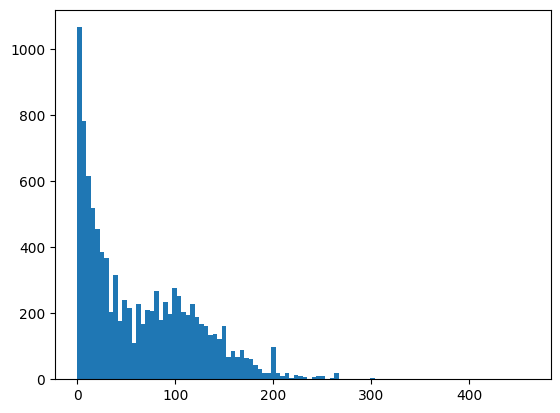

In [31]:
bins = plt.hist(df["budget_m"], bins=100)

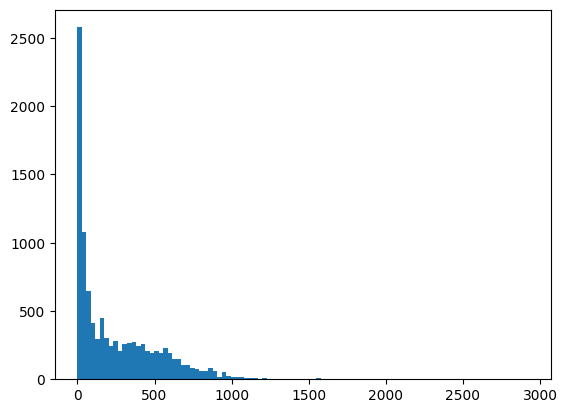

In [32]:
bins = plt.hist(df["revenue_m"], bins=100)

#### Feature engineering
Combining multiple columns together to make new features is a common practice in data analysis. It is a powerful way to gain new insight into data. 

Lets do a simple example of this and make a column called "profit"!

    profit = revenue - budget



In [33]:
# Make a column called profit and add it to the DataFrame.

df["profit_m"] = df["revenue_m"] - df["budget_m"]


In [34]:
df["profit_m"]

0         196.616668
1        1856.794914
2         624.459031
3          21.900000
4         263.941959
            ...     
10173       2.353729
10174      -2.447457
10175       1.197992
10176     359.661306
10177     447.001839
Name: profit_m, Length: 10178, dtype: float64

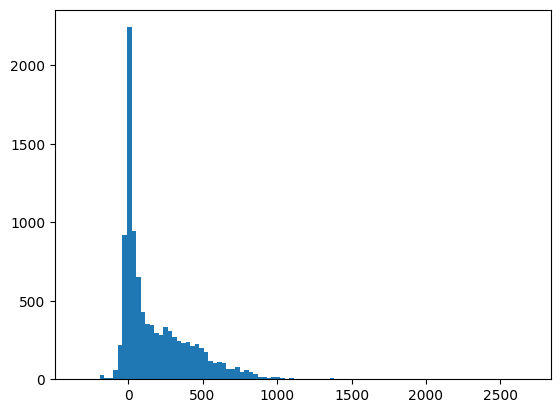

In [35]:
bins = plt.hist(df["profit_m"], range=(df["profit_m"].min(), df["profit_m"].max()), bins=100)

#### Masking
Creating masks is a convinient way to filter through data. 

By creating a condition and running over the data, we can create a mask of True/False statements.

Operators in python are:

    greater-than: >
    less-than: <
    equal: ==
    not equal: !=
    greater-than equal: >=
    less-than equal: <=

Lets see how they work in action!

In [36]:
import numpy as np

# Create an example array
ex = np.array([0,1,2,3,4,5,6])
print("This is the example array: ", ex)

# Set a condition, greater-than or equal to three
mask = ex >= 3
print("This is the mask: ", mask)

# use the mask to filter through the results
print("These are the values in the array which pass the condition: ", ex[mask])

This is the example array:  [0 1 2 3 4 5 6]
This is the mask:  [False False False  True  True  True  True]
These are the values in the array which pass the condition:  [3 4 5 6]


Pandas is built to handle masks as well!

In [47]:
# search for films that profited over 250 million dollars

# define the mask
mask = df["profit_m"] > 250

# We can use the count method to see how many films managed to earn that much
df.loc[mask,"profit_m"].count()

3237

In [48]:
# Determine how many films netted a negative profit
mask_neg_profit = df["profit_m"] < -0
df.loc[mask_neg_profit, "profit_m"].count()

1995

### Avioding multiple masks: Query

Built in method for handling multiple conditions

    df.query()

In [49]:
# What percent of films at a loss costed under 2 million dollars to make.

df.query('budget_m < 1 and profit_m > 0')["profit_m"].count()

254

### Datetime
Time is an important factor in determaning trends.

Thankfully our dataframe has a "date_x" column which has the information on when the movie was released. 

What is a bit unforunate is that the information comes in the form of a string.

Pandas is ready for that!

#### pd.to_datetime()

The pd.to_datetime() function turns strings that meet a certain criteria into Timestamp objects. 

     pd.to_datetime("date_column")

This will output a series containing datetime objects.

In [ ]:
# Use the pd.to_datetime function to define a new column in the DataFrame called "date_time" containing Timestamped objects

df["date_time"] = pd.to_datetime(df["date_x"])

In [ ]:
df.loc[0,"date_time"]

Lets go one step further and make seperate columns for the year and month!

In [ ]:
# Define lists to store values
year = []
month = []

# loop through Timestamp data
for date in df["date_time"]:
    # Seperate year and month attributes and store appropriatly
    year.append(date.year)
    month.append(date.month)

# create new columns in df 
df["year"] = year
df["month"] = month

#### Lets use the dates! 

Can you tell me the mean budget for movies in 2022 and 2023.

Hint: 
Remember that the condition for equal is ==

In [ ]:
# Mean budget for 2022 and 2023

mask = df["year"] == 2022 
print("mean budget 2022: ", df.loc[mask, "budget_m"].mean())

mask = df["year"] == 2023
print("mean budget 2023", df.loc[mask, "budget_m"].mean())


#### To many masks

I want to know these states for every year of data we have available!

But this is too slow, there must be a better way to run these queries and calculations. 

#### Groupby

groupby() is that exact method.

Here is how it works. 

    We create what is called a groupby object by running the groupby method on a DataFrame and passing a column_name as the argument:
        
        df.groupby("year")

This is almost like a DataFrame where the new indices are the **unique values** of the column_name argument passed to the method.

So note: this will only really work well with somewhat categorical data.

    Next we run aggregation methods or agg() on this groupby object.
        df.groupby("year").agg('mean')

    We can specify which columns we want to work on the same way we would in a DataFrame object:
        df.groupby("year")["budget_m"].agg('mean')

    We can also run multiple aggregation functions at once and have those be the new column names!
    We do this by passing multiple arguments to agg() in the form of a list:
        df.groupby("year")["budget_m"].agg(['sum','count','mean'])

If a single column is not specified and multiple aggregation methods are used we will get a DataFrame which has a heirarchical index structure. This is not the worst thing but we will avoid it for now. 

In [ ]:
# Run the command listed above where we group the data by the year of their release date

# your code here
by_year = df.groupby("year")
budget_by_year = by_year["budget_m"].agg(['std','mean','count'])
budget_by_year

In [ ]:
plt.plot(budget_by_year)

#### Making groupby your friend

Groupby is a powerful function which at times can be a bit confusing. 

I really recommend using your own words to describe what the function is doing.

Please! Think of another question which would be best answered by groupby and make the plot. 

Believe me, it is worth it to play with this function to really have it stick. 

#### apply

For some inspiration run the cell below which creates a column called grade which uses the score to create an +A to F grade category.

We can use the apply method to run a function on all values in the series:
    
    df.[column_name].apply(function_name)

In [ ]:
# Function to assign grades based on score
def assign_grade(score):
    thresh = [97, 93, 90, 87, 83, 80, 77, 73, 70, 67, 63, 60, 0]
    grades = ['+A','A','-A','+B','B','-B','+C','C','-C','+D', 'D', '-D', 'F']
    
    i=0
    
    while True:
        if score >= thresh[i]:
            return grades[i]
        i+=1

In [ ]:
# Use the apply function on the score column to create a new grade column
df["grades"] = df["score"].apply(assign_grade)
df["grades"]

In [ ]:
# ProTip! 

# You can use lambda function within apply - lets use that to show a more elegant method to replace that nasty for-loop we used on the dates

# Lambda are small annonymous functions. They work as: lambda input : output. Apply will funnel in all of the dates as input.
df["year"] = df["date_time"].apply(lambda x : x.year)
df["month"] = df["date_time"].apply(lambda x : x.month)

# This was rushed so don't worry if you want to leave it for now.

In [ ]:
# Here is some code to make a new genre column which is a bit easier to work with
def genre_to_list(genre):
    if type(genre) != str:
        return "-"
    return genre.replace(',\xa0' , ' ').split()

df["genre_list"] = df["genre"].apply(genre_to_list)
df["genre_list"]

In [ ]:
# Make you're own groupby object - and sorry that the genre column is difficult to work with
grades = ['+A','A','-A','+B','B','-B','+C','C','-C','+D', 'D', '-D', 'F']
by_grade = df.groupby("grades")
rev_by_grade = by_grade["revenue_m"].agg("mean")
organized_data = []

for grade in grades:
    organized_data.append(rev_by_grade.loc[grade])

plt.plot(grades, organized_data)

### Plotting

Visualizing data is an integral part of data analysis and often leads to insights which would have been difficult to recognize without it. 

Lucky for us, python has lots of tools to help us in making beautiful graphs, figures and plots.

In [ ]:
# Taking the index of the groupby DataFrame will give us the x variable
x = budget_by_year.index
x

In [ ]:
# Plotting script for line plot

def plot_y_by_x(x, y, std=None, x_label="year", y_label="mean budget"):
    # Set the style of the plot
    sns.set(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Plot mean budget
    sns.lineplot(x=x, y=y, marker='o', label=y_label, color='b')

    # Fill the area between mean_budget ± std_budget
    if std is not None:
        plt.fill_between(x,
                 y - std,
                 y + std,
                 color='b', alpha=0.2, label='Std Dev')

    # Customize the plot
    plt.title(f'{y_label} by {x_label}')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()

    # Display the plot
    plt.show()

In [ ]:
# Lets first plot the average price of a movie by year. We can also include the standard deviarion 
y = budget_by_year["mean"]
std = budget_by_year["std"]
plot_y_by_x(x, y, std=std)

In [ ]:
y = budget_by_year["sum"]
plot_y_by_x(x, y, y_label="sum budget")

In [ ]:
# Can you use the plotting script to plot the number of films released per year

# your code here


Woah - looks a lot like the plot of the total money spent!

Well, that makes sense given the average cost per film is pretty constant over the years.

#### Great!

That's all for now - I really hope you enjoyed this tour of Pandas and that you found the exercises useful. 

There is still so much left unexplored. If you can dream it - you can probably do it with Pandas. 
